In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
font = {"size": 22}
plt.rc("font", **font)
plt.rc("legend",fontsize=16)

# Radial distribution and g(r) integral of Fe2+,Fe3+,O2- ion pairs
fe2fe2_nvt = pd.read_csv("65_5ns.dat", sep="\s+", header=None)
fe2fe2_nvt.columns = ["Distance", "RDF"]

fe2fe2_17_nvt = pd.read_csv("17_10ns.dat", sep="\s+", header=None)
fe2fe2_17_nvt.columns = ["Distance", "RDF"]

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(fe2fe2_nvt["Distance"], fe2fe2_nvt["RDF"], "b", linewidth=3, label="$\mathrm{{Fe^{2+}}}$")

#ax1.set_ylim([1,25])
ax1.set_xlim([2.6,3.5])

ax1.axvline(x=2.998135, color="black", ymax=1, ls="--", linewidth=1.5, label="crystal\nstructure")

ax1.set_xlabel(r"$r\,(\mathrm{\AA})$",labelpad=12, fontsize=24)
ax1.set_ylabel(r"$g\,(r)$", labelpad=15, fontsize=24)

fig.savefig('65L.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('65L.png',dpi=300.0,format='png', bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(fe2fe2_17_nvt["Distance"], fe2fe2_17_nvt["RDF"], "b", linewidth=3, label="$\mathrm{{Fe^{2+}}}$")

#ax1.set_ylim([5,80])
ax1.set_xlim([2.6,3.5])

ax1.axvline(x=2.998135, color="black", ymax=1, ls="--", linewidth=1.5, label="crystal\nstructure")

ax1.set_xlabel(r"$r\,(\mathrm{\AA})$",labelpad=12, fontsize=24)
ax1.set_ylabel(r"$g\,(r)$", labelpad=15, fontsize=24)

fig.savefig('17L.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('17L.png',dpi=300.0,format='png', bbox_inches = "tight")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Read the data
fe2fe2_nvt = pd.read_csv("65_5ns.dat", sep="\s+", header=None)
fe2fe2_nvt.columns = ["Distance", "RDF"]

fe2fe2_17_nvt = pd.read_csv("17_10ns.dat", sep="\s+", header=None)
fe2fe2_17_nvt.columns = ["Distance", "RDF"]

# Define the range to fit the Gaussian (around the first peak)
fit_range_nvt = (fe2fe2_nvt["Distance"] > 2.6) & (fe2fe2_nvt["Distance"] < 3.5)
fit_range_17_nvt = (fe2fe2_17_nvt["Distance"] > 2.6) & (fe2fe2_17_nvt["Distance"] < 3.5)

# Fit Gaussian to the first peak for both datasets
popt_nvt, _ = curve_fit(gaussian, fe2fe2_nvt["Distance"][fit_range_nvt], fe2fe2_nvt["RDF"][fit_range_nvt])
popt_17_nvt, _ = curve_fit(gaussian, fe2fe2_17_nvt["Distance"][fit_range_17_nvt], fe2fe2_17_nvt["RDF"][fit_range_17_nvt])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot first dataset
ax1.plot(fe2fe2_nvt["Distance"], fe2fe2_nvt["RDF"], "b", linewidth=3, label="$\mathrm{{Fe^{2+}}}$")
ax1.plot(fe2fe2_nvt["Distance"][fit_range_nvt], gaussian(fe2fe2_nvt["Distance"][fit_range_nvt], *popt_nvt), "r--", linewidth=2, label="Gaussian fit")
ax1.axvline(x=popt_nvt[1], color="green", ls="--", label=f"Peak at {popt_nvt[1]:.3f} Å")
ax1.axvline(x=2.998135, color="black", ls="--", linewidth=1.5, label="crystal\nstructure")
ax1.set_xlim([2.6, 3.5])
ax1.set_xlabel(r"$r\,(\mathrm{\AA})$",labelpad=12, fontsize=22)
ax1.set_ylabel(r"$g\,(r)$", labelpad=15, fontsize=22)
ax1.legend(fontsize=16)
ax1.set_title("65L", fontsize=22) 

# Plot second dataset
ax2.plot(fe2fe2_17_nvt["Distance"], fe2fe2_17_nvt["RDF"], "b", linewidth=3, label="$\mathrm{{Fe^{2+}}}$")
ax2.plot(fe2fe2_17_nvt["Distance"][fit_range_17_nvt], gaussian(fe2fe2_17_nvt["Distance"][fit_range_17_nvt], *popt_17_nvt), "r--", linewidth=2, label="Gaussian fit")
ax2.axvline(x=popt_17_nvt[1], color="green", ls="--", label=f"Peak at {popt_17_nvt[1]:.3f} Å")
ax2.axvline(x=2.998135, color="black", ls="--", linewidth=1.5, label="crystal\nstructure")
ax2.set_xlim([2.6, 3.5])
ax2.set_xlabel(r"$r\,(\mathrm{\AA})$",labelpad=12, fontsize=22)
ax2.set_ylabel(r"$g\,(r)$", labelpad=15, fontsize=22)
ax2.legend(fontsize=16)
ax2.set_title("17L", fontsize=22) 


plt.tight_layout()
plt.savefig('RDF_fitted_subplots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('RDF_fitted_subplots.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

# Output peak positions
print(f"First peak max (Fe2+ 65): {popt_nvt[1]:.3f} Å")
print(f"First peak max (Fe2+ 17): {popt_17_nvt[1]:.3f} Å")

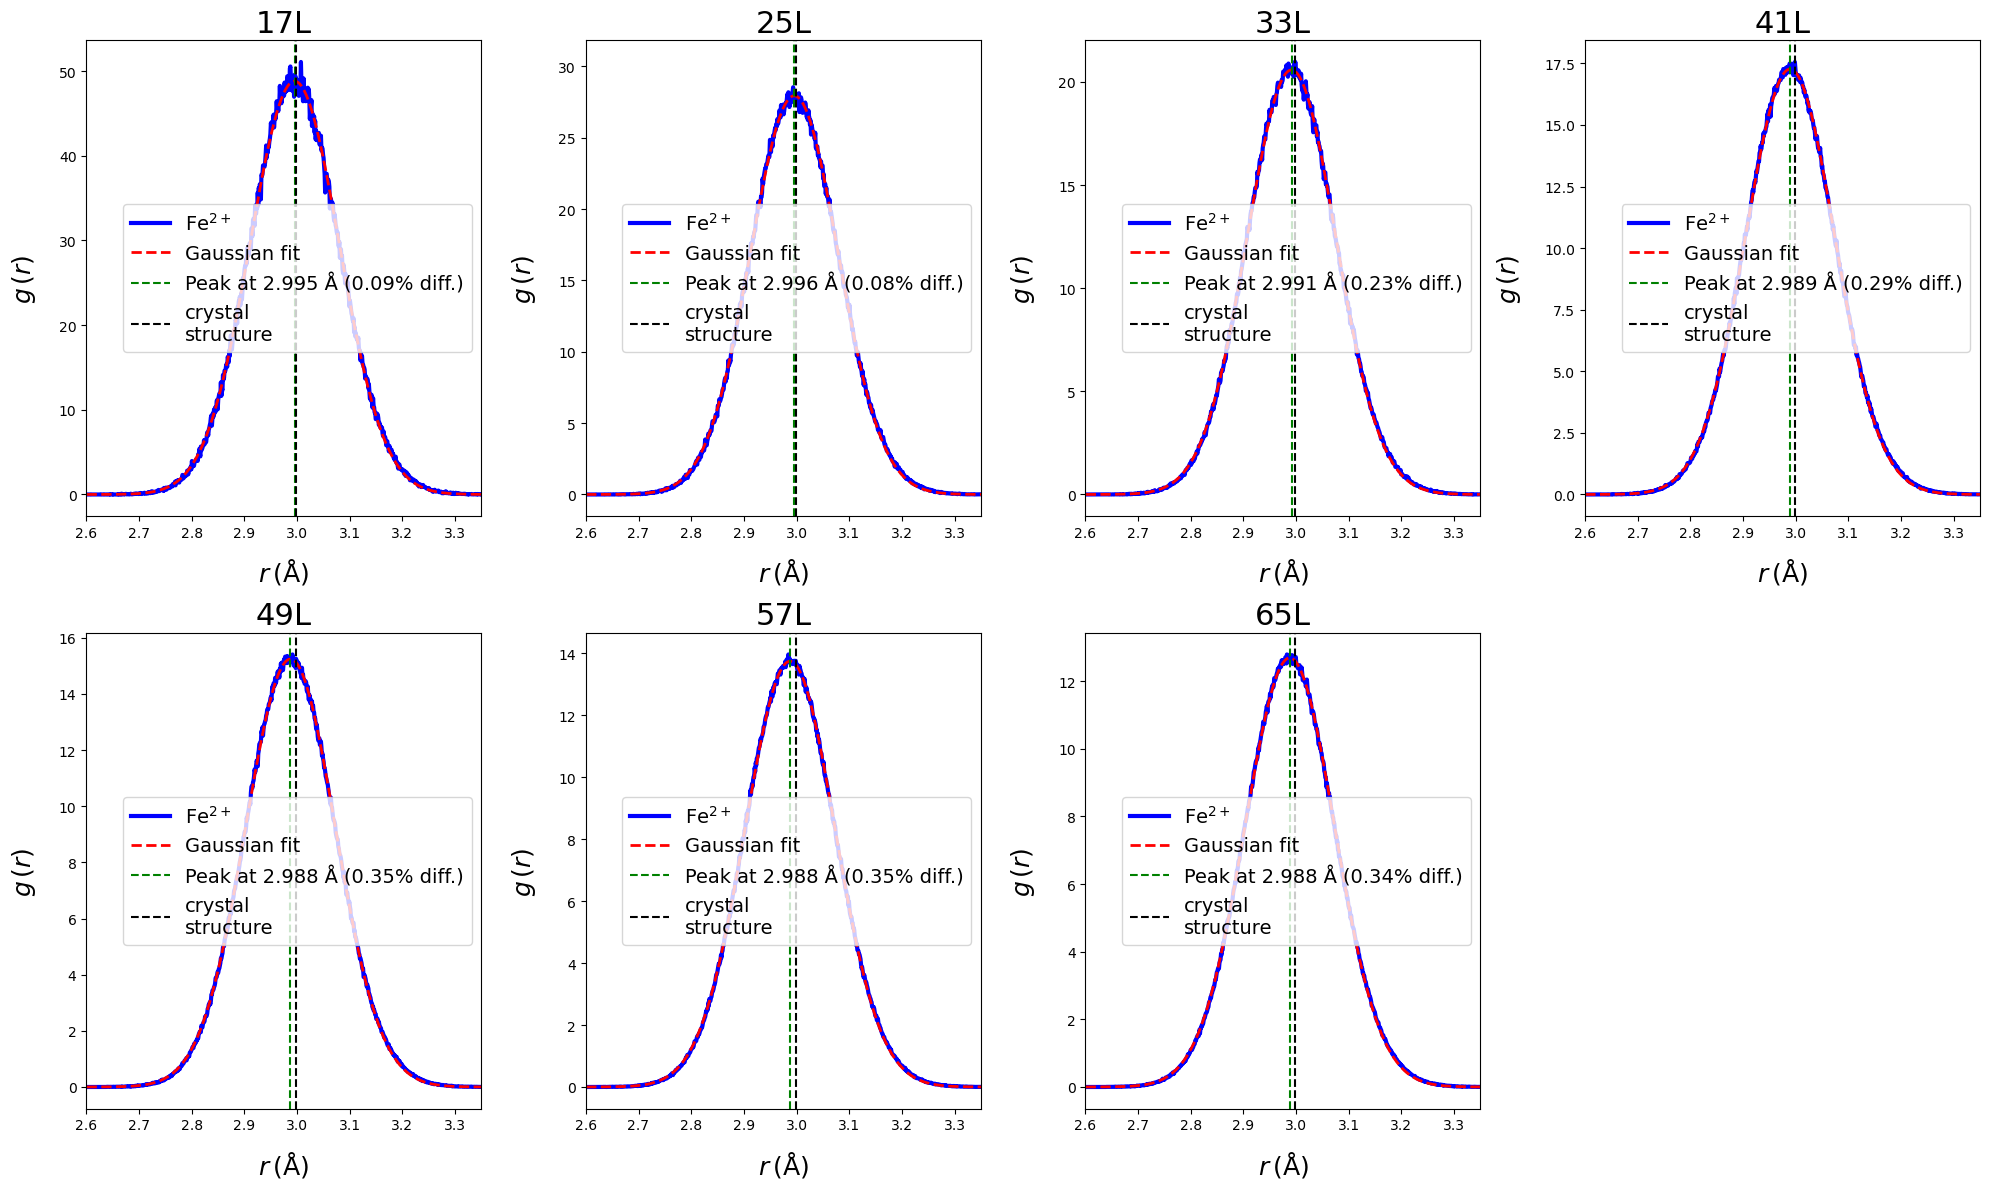

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# List of datasets and their labels
datasets = [
    ("17_5ns.dat", "17L"),
    ("25_5ns.dat", "25L"),
    ("33_5ns.dat", "33L"),
    ("41_5ns.dat", "41L"),
    ("49_5ns.dat", "49L"),
    ("57_5ns.dat", "57L"),
    ("65_5ns.dat", "65L")
]

# Crystal structure reference value
crystal_peak = 2.998135  # Å

# Create subplots (2 rows, 4 columns to fit 7 datasets)
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()  # Flatten axes to easily loop over

# Loop through datasets
for i, (filename, label) in enumerate(datasets):
    # Read the data
    data = pd.read_csv(filename, sep="\s+", header=None)
    data.columns = ["Distance", "RDF"]
    
    # Define the range to fit the Gaussian (around the first peak)
    fit_range = (data["Distance"] > 2.6) & (data["Distance"] < 3.5)
    
    # Fit Gaussian to the first peak
    popt, _ = curve_fit(gaussian, data["Distance"][fit_range], data["RDF"][fit_range])
    
    # Calculate percentage difference between Gaussian peak and crystal structure
    perc_diff = 100 * abs(popt[1] - crystal_peak) / crystal_peak
    
    # Plot the RDF
    axes[i].plot(data["Distance"], data["RDF"], "b", linewidth=3, label=r"$\mathrm{Fe^{2+}}$")
    axes[i].plot(data["Distance"][fit_range], gaussian(data["Distance"][fit_range], *popt), "r--", linewidth=2, label="Gaussian fit")
    axes[i].axvline(x=popt[1], color="green", ls="--", label=f"Peak at {popt[1]:.3f} Å ({perc_diff:.2f}% diff.)")
    axes[i].axvline(x=crystal_peak, color="black", ls="--", linewidth=1.5, label="crystal\nstructure")
    axes[i].set_xlim([2.6, 3.4])
    axes[i].set_xlabel(r"$r\,(\mathrm{\AA})$", labelpad=12, fontsize=18)
    axes[i].set_ylabel(r"$g\,(r)$", labelpad=15, fontsize=18)
    axes[i].set_title(f"{label}", fontsize=22)
    axes[i].legend(fontsize=14)

# Hide the last empty subplot (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('RDF_fitted_subplots_all5.pdf', format='pdf', bbox_inches='tight')
plt.savefig('RDF_fitted_subplots_all5.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

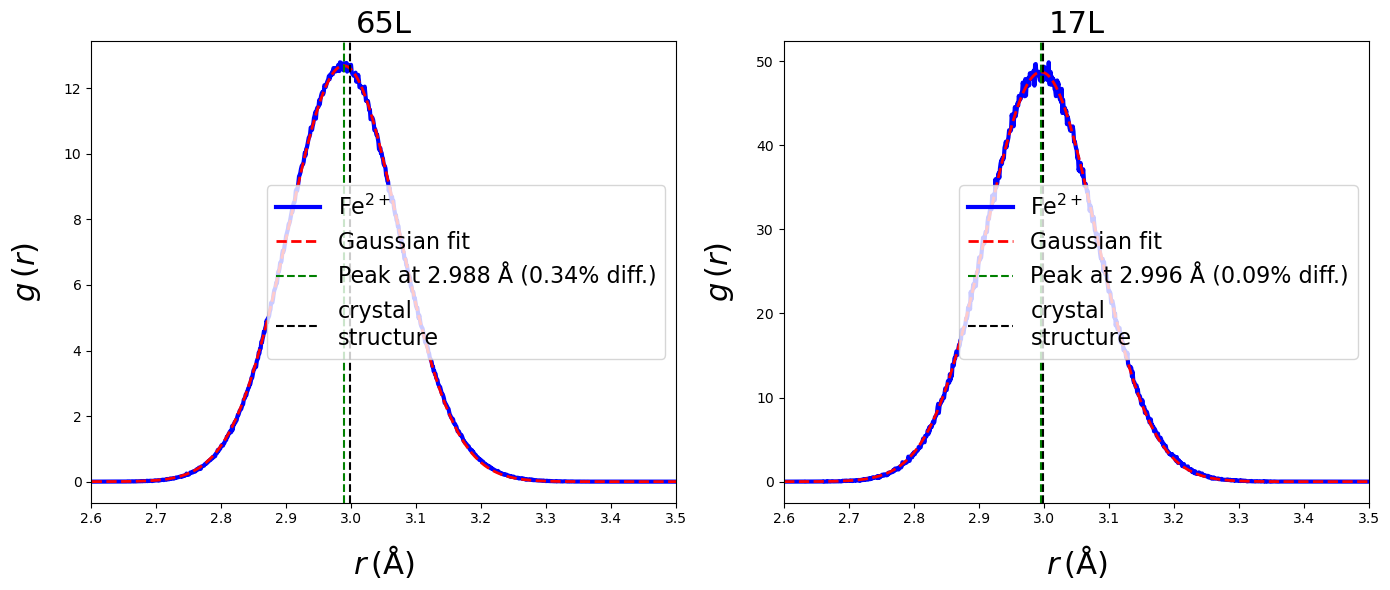

First peak max (Fe2+ 65): 2.988 Å, 0.34% difference from crystal structure
First peak max (Fe2+ 17): 2.996 Å, 0.09% difference from crystal structure


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Read the data
fe2fe2_nvt = pd.read_csv("65_5ns.dat", sep="\s+", header=None)
fe2fe2_nvt.columns = ["Distance", "RDF"]

fe2fe2_17_nvt = pd.read_csv("17_10ns.dat", sep="\s+", header=None)
fe2fe2_17_nvt.columns = ["Distance", "RDF"]

# Define the range to fit the Gaussian (around the first peak)
fit_range_nvt = (fe2fe2_nvt["Distance"] > 2.6) & (fe2fe2_nvt["Distance"] < 3.5)
fit_range_17_nvt = (fe2fe2_17_nvt["Distance"] > 2.6) & (fe2fe2_17_nvt["Distance"] < 3.5)

# Fit Gaussian to the first peak for both datasets
popt_nvt, _ = curve_fit(gaussian, fe2fe2_nvt["Distance"][fit_range_nvt], fe2fe2_nvt["RDF"][fit_range_nvt])
popt_17_nvt, _ = curve_fit(gaussian, fe2fe2_17_nvt["Distance"][fit_range_17_nvt], fe2fe2_17_nvt["RDF"][fit_range_17_nvt])

# Crystal structure reference value
crystal_peak = 2.998135  # Å

# Calculate percentage differences
perc_diff_nvt = 100 * abs(popt_nvt[1] - crystal_peak) / crystal_peak
perc_diff_17_nvt = 100 * abs(popt_17_nvt[1] - crystal_peak) / crystal_peak

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot first dataset
ax1.plot(fe2fe2_nvt["Distance"], fe2fe2_nvt["RDF"], "b", linewidth=3, label="$\mathrm{{Fe^{2+}}}$")
ax1.plot(fe2fe2_nvt["Distance"][fit_range_nvt], gaussian(fe2fe2_nvt["Distance"][fit_range_nvt], *popt_nvt), "r--", linewidth=2, label="Gaussian fit")
ax1.axvline(x=popt_nvt[1], color="green", ls="--", label=f"Peak at {popt_nvt[1]:.3f} Å ({perc_diff_nvt:.2f}% diff.)")
ax1.axvline(x=crystal_peak, color="black", ls="--", linewidth=1.5, label="crystal\nstructure")
ax1.set_xlim([2.6, 3.5])
ax1.set_xlabel(r"$r\,(\mathrm{\AA})$", labelpad=12, fontsize=22)
ax1.set_ylabel(r"$g\,(r)$", labelpad=15, fontsize=22)
ax1.legend(fontsize=16)
ax1.set_title("65L", fontsize=22)

# Plot second dataset
ax2.plot(fe2fe2_17_nvt["Distance"], fe2fe2_17_nvt["RDF"], "b", linewidth=3, label="$\mathrm{{Fe^{2+}}}$")
ax2.plot(fe2fe2_17_nvt["Distance"][fit_range_17_nvt], gaussian(fe2fe2_17_nvt["Distance"][fit_range_17_nvt], *popt_17_nvt), "r--", linewidth=2, label="Gaussian fit")
ax2.axvline(x=popt_17_nvt[1], color="green", ls="--", label=f"Peak at {popt_17_nvt[1]:.3f} Å ({perc_diff_17_nvt:.2f}% diff.)")
ax2.axvline(x=crystal_peak, color="black", ls="--", linewidth=1.5, label="crystal\nstructure")
ax2.set_xlim([2.6, 3.5])
ax2.set_xlabel(r"$r\,(\mathrm{\AA})$", labelpad=12, fontsize=22)
ax2.set_ylabel(r"$g\,(r)$", labelpad=15, fontsize=22)
ax2.legend(fontsize=16)
ax2.set_title("17L", fontsize=22) 

plt.tight_layout()
plt.savefig('RDF_fitted_subplots_with_percentage_diff.pdf', format='pdf', bbox_inches='tight')
plt.savefig('RDF_fitted_subplots_with_percentage_diff.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

# Output peak positions and percentage differences
print(f"First peak max (Fe2+ 65): {popt_nvt[1]:.3f} Å, {perc_diff_nvt:.2f}% difference from crystal structure")
print(f"First peak max (Fe2+ 17): {popt_17_nvt[1]:.3f} Å, {perc_diff_17_nvt:.2f}% difference from crystal structure")
